In [1]:
# [Ian, Noriega]
# [10145657]
# [MMA]
# [2021W]
# [MMA869]
# [August 16th, 2020]

# Answer to Question 7, Part 2

# Import Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [103]:
OJ = pd.read_csv('OJ.csv')

# Preprocessing & EDA

In [104]:
#preview our dataset
OJ.info()
OJ.describe()
#observations: 1070 instances, doesn't look like any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
Unnamed: 0        1070 non-null int64
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(6), object(2)
memory usage: 159.0+ KB


,Unnamed: 0,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,535.500000,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,309.026698,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,1.000000,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,268.250000,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,535.500000,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,802.750000,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,1070.000000,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [105]:
OJ.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [106]:
#drop random unnamed index column
OJ.drop('Unnamed: 0', axis=1, inplace=True)

CH    0.61028
MM    0.38972
Name: Purchase, dtype: float64

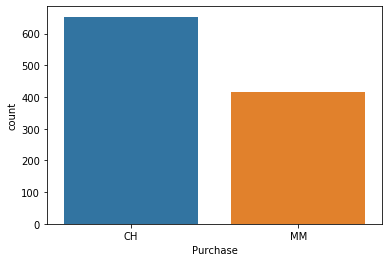

In [107]:
#explore our target (diabetes diagnosis)
sns.countplot(x='Purchase', data=OJ)

OJ['Purchase'].value_counts(normalize=True) #shows % split

#observations: From our sample, Citrus Hill appears to be the more popular OJ choice
#amongst customers (approx. 60:40 split)

In [108]:
#encode purchase categorical (1 = Citrus Hill)
OJ_dummy = pd.get_dummies(OJ['Purchase'], prefix='Purchase')

In [109]:
#add our created dummies to our df
OJ = OJ.join(OJ_dummy)

In [110]:
#drop the original Purchase var and the Minute Maid dummy (unnecessary)
OJ.drop(['Purchase', 'Purchase_MM'], axis=1, inplace=True)

In [111]:
OJ.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase_CH
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,1
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,1
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,1
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,0
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,1


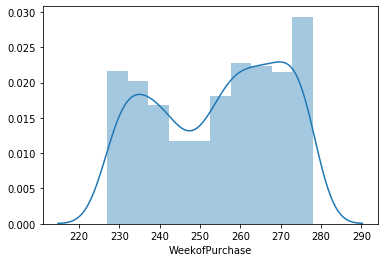

In [112]:
#explore WeekofPurchase
sns.distplot(OJ['WeekofPurchase'])
#observations: looks like we have a sample from around week 225-275

In [113]:
OJ['StoreID'].value_counts()
#observations: we have 5 different stores...this is technically a categorical var and we should encode

7    356
2    222
3    196
1    157
4    139
Name: StoreID, dtype: int64

In [114]:
#one-hot encoding for StoreID
StoreID_dummy = pd.get_dummies(OJ['StoreID'], prefix='StoreID')

In [115]:
#add our created dummies to our df
OJ = OJ.join(StoreID_dummy)

In [116]:
#drop the original StoreID var, STORE var, and Store7
OJ.drop(['StoreID', 'STORE', 'Store7'], axis=1, inplace=True)

In [117]:
OJ

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,Purchase_CH,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,237,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1,0,0,0,0
1,239,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1,0,0,0,0
2,245,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1,0,0,0,0
3,227,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1,0,0,0,0
4,228,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,252,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,0.000000,0.053763,0.23,1,0,0,0,0,1
1066,256,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,0.000000,0.000000,0.32,1,0,0,0,0,1
1067,257,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,0.000000,0.000000,0.32,0,0,0,0,0,1
1068,261,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,0.112676,0.000000,0.27,1,0,0,0,0,1


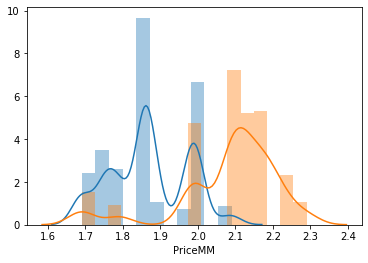

In [118]:
#explore PriceCH
sns.distplot(OJ['PriceCH']) #blue
sns.distplot(OJ['PriceMM']) #orange
#observations: It looks as though Minute Maid is at a slightly higher price point that Citrus Hill

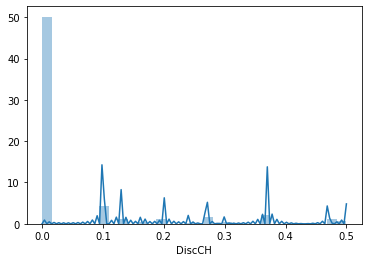

In [119]:
#explore DiscCH
sns.distplot(OJ['DiscCH'])
#observations: Vast majority of CH transactions don't include a discount

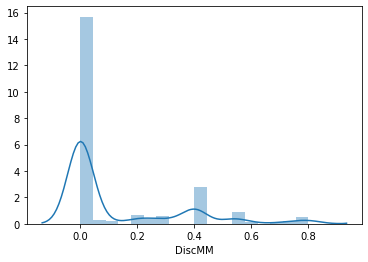

In [120]:
#explore DiscMM
sns.distplot(OJ['DiscMM'])
#observations: Discounts appear to be fairly more common with MM

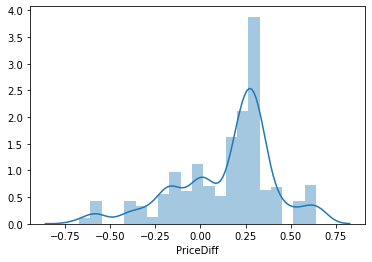

In [122]:
#explore pricediff
sns.distplot(OJ['PriceDiff'])

In [123]:
#Final look at our df
OJ.info()
#observations: we look good to go - no categoricals/redundancies remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 20 columns):
WeekofPurchase    1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
Purchase_CH       1070 non-null uint8
StoreID_1         1070 non-null uint8
StoreID_2         1070 non-null uint8
StoreID_3         1070 non-null uint8
StoreID_4         1070 non-null uint8
StoreID_7         1070 non-null uint8
dtypes: float64(11), int64(3), uint8(6)
memory usage: 123.4 KB


In [126]:
OJ.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,Purchase_CH,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,237,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1,0,0,0,0
1,239,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1,0,0,0,0
2,245,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1,0,0,0,0
3,227,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1,0,0,0,0
4,228,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0,0,0,0,1


# Train/Test Split

In [127]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [129]:
#define X (features) and y (target)
X = OJ.drop('Purchase_CH', axis=1)
y = OJ['Purchase_CH']

In [132]:
#following a standard holdout method, split our data into train/test
#let's take a stratified split just in case (recall 60:40 target imbalance)
#we will train our model on the train set and use the test set to evaluate its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024, stratify=y)

In [136]:
#preview training features
X_train #856 instances

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
767,263,1.86,2.13,0.27,0.00,0,0,0.868928,2.13,1.59,0.54,0.000000,0.145161,0.27,0,0,0,0,1
1026,260,1.86,2.13,0.00,0.24,0,0,0.769835,1.89,1.86,0.03,0.112676,0.000000,0.27,0,0,0,0,1
206,241,1.86,2.09,0.00,0.00,0,0,0.813222,2.09,1.86,0.23,0.000000,0.000000,0.23,0,0,0,0,1
475,253,1.86,2.09,0.10,0.00,0,0,0.400000,2.09,1.76,0.33,0.000000,0.053763,0.23,0,0,0,0,1
878,260,1.99,2.09,0.00,0.00,0,0,0.636160,2.09,1.99,0.10,0.000000,0.000000,0.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,248,1.89,2.09,0.00,0.00,0,0,0.870112,2.09,1.89,0.20,0.000000,0.000000,0.20,0,1,0,0,0
772,244,1.86,2.09,0.00,0.00,0,0,0.256000,2.09,1.86,0.23,0.000000,0.000000,0.23,0,1,0,0,0
1007,272,1.99,2.09,0.00,0.40,0,0,0.253687,1.69,1.99,-0.30,0.191388,0.000000,0.10,0,0,1,0,0
135,274,1.96,2.18,0.00,0.80,0,1,0.977093,1.38,1.96,-0.58,0.366972,0.000000,0.22,0,1,0,0,0


In [139]:
#check the distribution of our target between train and test set
#60:40 ratio preserved because of stratified sampling
print(y_train.value_counts())
print(y_test.value_counts())

1    522
0    334
Name: Purchase_CH, dtype: int64
1    131
0     83
Name: Purchase_CH, dtype: int64


# Model Building - Decision Tree

In [140]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [220]:
#define our decision tree model
dtree = DecisionTreeClassifier(random_state=1024)

#fit the decision tree to our training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1024)

In [221]:
#use the decision tree to predict labels for our test set
y_pred_dtree = dtree.predict(X_test)

In [222]:
#let's check our predictions out
y_pred_dtree

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [223]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree, average='macro')))

#observations: Accuracy = 77%, Mean F1-score = 76%...pretty strong

[[ 63  20]
 [ 30 101]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        83
           1       0.83      0.77      0.80       131

    accuracy                           0.77       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.77      0.77      0.77       214

F1 score = 0.76


In [145]:
#hyperparameter tuning using gridsearch
from sklearn.model_selection import GridSearchCV

In [146]:
#here we create a grid of hyperparameter values for gridsearch to run through
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'max_depth': [2,10,50,100,200], 
                 'max_leaf_nodes': [None,5,10,50,100],
                 'min_impurity_decrease': [0,0.1,0.2],
                 'min_samples_leaf': [1,10,50],
                 'min_samples_split': [2,10,50]}

In [147]:
#apply gridsearch to our model
dtree_gs = GridSearchCV(dtree, param_grid=parameters_grid, scoring="accuracy",
                       n_jobs=3, cv=5, return_train_score=True)

In [148]:
#fit it to our training data
%time dtree_gs.fit(X_train, y_train) # %time captures runtime

Wall time: 26.1 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 10, 50, 100, 200],
                         'max_leaf_nodes': [None, 5, 10, 50, 100],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 10, 50]},
             return_train_score=True, scoring='accuracy')

In [149]:
#let's check out the best parameters
dtree_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [150]:
#now let's used this tuned model to re-create predictions on our test set
y_pred_dtree_gs = dtree_gs.predict(X_test)

In [151]:
#check out our predictions
y_pred_dtree_gs

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [152]:
#evaluate our tuned model's performance
print(confusion_matrix(y_test, y_pred_dtree_gs))
print(classification_report(y_test, y_pred_dtree_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree_gs, average='macro')))

#observations: Accuracy = 85% (+8%), Mean F1-score = 83% (+7%)...very nice improvement!

[[ 62  21]
 [ 12 119]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        83
           1       0.85      0.91      0.88       131

    accuracy                           0.85       214
   macro avg       0.84      0.83      0.83       214
weighted avg       0.85      0.85      0.84       214

F1 score = 0.83


In [153]:
#let's try random search as well just for fun
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [154]:
#here we specify the range of potential values we want to test
parameters_dist = {'criterion': ('gini', 'gini', 'entropy'), #here we are making gini twice as likely to be selected (personal preference)
                 'max_depth': randint(2,200), #will obtain random integer between 2 and 200
                 'max_features': [None, "auto"],
                 'max_leaf_nodes': randint(5,500),
                 'min_impurity_decrease': uniform(0.0, 0.5),
                 'min_samples_leaf': randint(2,50),
                 'min_samples_split': randint(2,50)}

In [155]:
#apply randomsearch to our model
dtree_rs = RandomizedSearchCV(dtree, param_distributions=parameters_dist, scoring="accuracy", n_jobs=3, cv=5, 
                              return_train_score=True, n_iter=5000)

In [156]:
#fit it to our training data
%time dtree_rs.fit(X_train, y_train)

Wall time: 1min 29s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
                   n_iter=5000, n_jobs=3,
                   param_distributions={'criterion': ('gini', 'gini',
                                                      'entropy'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F3E2DBB88>,
                                        'max_features': [None, 'auto'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F3E2DB608>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F3E34AE48>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F3A673588>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F3E2CC4

In [157]:
#let's check out the best parameters
dtree_rs.best_params_

{'criterion': 'gini',
 'max_depth': 62,
 'max_features': None,
 'max_leaf_nodes': 88,
 'min_impurity_decrease': 0.00107743131685345,
 'min_samples_leaf': 27,
 'min_samples_split': 42}

In [158]:
#now let's use this tuned model to re-create predictions on our test set
y_pred_dtree_rs = dtree_rs.predict(X_test)

In [159]:
#check out our predictions
y_pred_dtree_rs

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [160]:
#evaluate our tuned model's performance
print(confusion_matrix(y_test, y_pred_dtree_rs))
print(classification_report(y_test, y_pred_dtree_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree_rs, average='macro')))

#observations: Accuracy = 84% (+7%), Mean F1-score = 83% (+7%)...very nice improvement
#but a tiny bit worse accuracy-wise than gridsearch

[[ 65  18]
 [ 17 114]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        83
           1       0.86      0.87      0.87       131

    accuracy                           0.84       214
   macro avg       0.83      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214

F1 score = 0.83


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


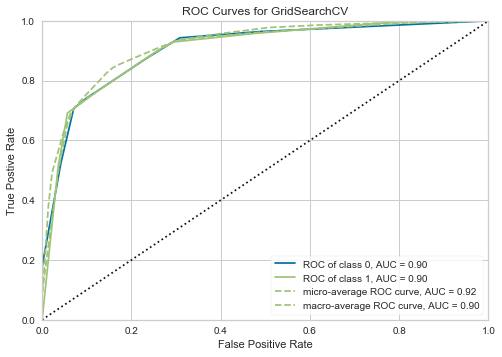

In [167]:
#check out ROC curve and resulting AUC
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(dtree_gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 90% (we look to have an excellent model)

In [ ]:
#Model Standings: 1) Decision Tree (dtree_gs: AUC = 90%, F1 = 83%, Acc = 85%)

# Model Building - Random Forest

In [229]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [230]:
#define the random forest model (w/ a couple default hyperparameter values)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=2, 
                            min_samples_split=2, random_state=1024)
#observe that we've set class_weight = 'balanced' to account for the slight 60:40 imbalance in our target

In [231]:
#fit the random forest model to our training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=1024)

In [232]:
#use the random forest classifier to predict labels for our test set
y_pred_rf = rf.predict(X_test)

In [233]:
#check out our predictions
y_pred_rf

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], dtype=uint8)

In [234]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf, average='macro')))

#observations: Accuracy = 85%, Mean F1-score = 84%...already looks to be stronger
#than our tuned decision tree...and we've yet to tune this RF!

[[ 67  16]
 [ 17 114]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        83
           1       0.88      0.87      0.87       131

    accuracy                           0.85       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

F1 score = 0.84


In [214]:
#investigate feature importance
print(rf.feature_importances_)

X.head()

[1.90313704e-02 1.24571010e-02 1.36270907e-03 4.68186301e-02
 1.16430225e-02 8.90933071e-03 2.85734594e-02 3.75251414e-01
 5.68477642e-02 2.88201554e-02 7.88253797e-02 7.00275237e-03
 4.06016774e-02 5.38002499e-02 1.81490751e-04 5.28208315e-04
 8.26784306e-02 5.69957265e-02 8.96711274e-02]


,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,237,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,0,0,0,0
1,239,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,0,0,0,0
2,245,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,0,0,0,0
3,227,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0,0,0,0
4,228,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0,0,0,1


Text(0, 0.5, 'Feature')

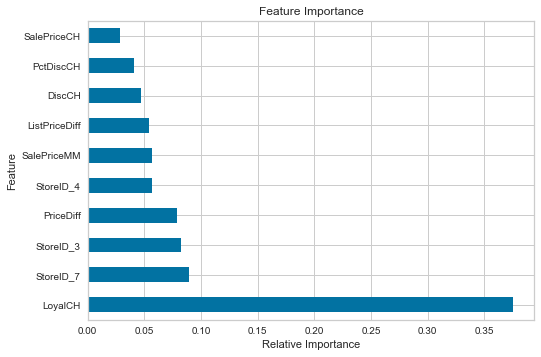

In [215]:
#Plot and examine RandomForest's feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
#observations: LoyalCH looks to be the most important feature...by far

In [235]:
#let's try hyperparameter tuning with grid search
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'n_estimators': [100, 500, 1000],
                 'max_depth': [2, 35, 70], 
                 'max_leaf_nodes': [5,35,70],
                 'min_samples_leaf': [1,4,8],
                 'min_samples_split': [2,5,10]}

In [236]:
#apply gridsearch to our model
rf_gs = GridSearchCV(rf, param_grid=parameters_grid, scoring = "accuracy", 
                    n_jobs=3, cv=5, return_train_score=True)

In [237]:
#fit it to our training data
%time rf_gs.fit(X_train, y_train)

Wall time: 9min 23s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=2, random_state=1024),
             n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 35, 70],
                         'max_leaf_nodes': [5, 35, 70],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True, scoring='accuracy')

In [238]:
#let's check the best parameters
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 35,
 'max_leaf_nodes': 35,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [239]:
#now let's use this tuned model to re-create predictions on our test set
y_pred_rf_gs = rf_gs.predict(X_test)

In [240]:
#check out our predictions
y_pred_rf_gs

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [241]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_rf_gs))
print(classification_report(y_test, y_pred_rf_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf_gs, average='macro')))

#observations: Accuracy = 85% (+0%), Mean F1-score = 84% (+0%)...no real improvement (still very good overall)

[[ 68  15]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        83
           1       0.88      0.86      0.87       131

    accuracy                           0.85       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

F1 score = 0.84


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


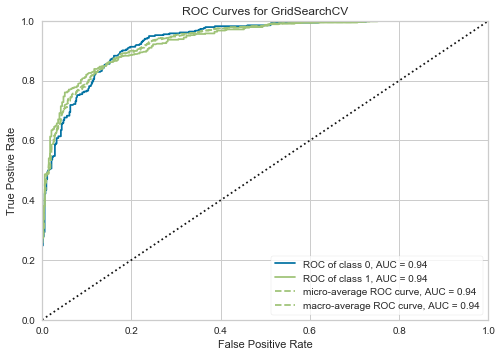

In [244]:
#check out ROC curve and resulting AUC
visualizer = ROCAUC(rf_gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 94% (we look to have an excellent model)

In [ ]:
#Model Standings: 1) Random Forest (rf_gs: AUC = 94%, F1 = 84%, Acc = 85%)
                 #2) Decision Tree (dtree_gs: AUC = 90%, F1 = 83%, Acc = 85%)

# Model Building - XGBoost

In [245]:
#import XGBoost
from xgboost import XGBClassifier

In [246]:
#define the XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, random_state=1024)

In [247]:
#fit the XGB classifier to our training data
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=2, random_state=1024)

In [248]:
#use the XGboost classifier to predict labels for our test set
y_pred_xgb = xgb.predict(X_test)

In [249]:
#check out our predictions
y_pred_xgb

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [250]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb, average='macro')))

#observations: Accuracy = 84%, Mean F1-score = 82%...again very good model

[[ 62  21]
 [ 14 117]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        83
           1       0.85      0.89      0.87       131

    accuracy                           0.84       214
   macro avg       0.83      0.82      0.82       214
weighted avg       0.84      0.84      0.83       214

F1 score = 0.82


In [252]:
#let's try hyperparameter tuning with grid search
parameters_grid = {'min_child_weight': [1,5,10],
                 'gamma': [0.5,1,2,5],
                 'subsample': [0.6,0.8,1.0], 
                 'colsample_bytree': [0.6,0.8,1.0],
                 'max_depth': [3,4,5]}

In [253]:
#apply gridsearch to our model
xgb_gs = GridSearchCV(xgb, param_grid=parameters_grid, scoring="accuracy", 
                     n_jobs=3, cv=5, return_train_score=True)

In [254]:
#fit it to our training data
%time xgb_gs.fit(X_train, y_train)

Wall time: 54.1 s


GridSearchCV(cv=5, estimator=XGBClassifier(max_depth=2, random_state=1024),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             return_train_score=True, scoring='accuracy')

In [255]:
#let's check the best parameters
xgb_gs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 2,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

In [256]:
#now let's use this tuned model to re-create predictions on our test set
y_pred_xgb_gs = xgb_gs.predict(X_test)

In [257]:
#check out our predictions
y_pred_xgb_gs

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [258]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_xgb_gs))
print(classification_report(y_test, y_pred_xgb_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb_gs, average='macro')))

#observations: Accuracy = 85% (+1%), Mean F1-score = 84% (+2%)...nice little boost from gridsearch here

[[ 65  18]
 [ 14 117]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        83
           1       0.87      0.89      0.88       131

    accuracy                           0.85       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

F1 score = 0.84


In [262]:
#let's try random search here as well
#here we specify the range for possible values to test
parameters_dist = {'min_child_weight': randint(1, 20),
                 'gamma': [0.5, 1, 2, 5, 10],
                 'subsample': [0.4, 0.6, 0.8, 1.0],
                 'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
                 'max_depth': randint(3, 10)}

In [265]:
#apply random search to our model
xgb_rs = RandomizedSearchCV(xgb, param_distributions=parameters_dist, scoring="accuracy", 
                                n_jobs=3, cv=5, return_train_score=True, n_iter=1000)

In [266]:
#fit it to our training data
%time xgb_rs.fit(X_train, y_train)

Wall time: 2min 30s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(max_depth=2, random_state=1024),
                   n_iter=1000, n_jobs=3,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0.5, 1, 2, 5, 10],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F4208ED08>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F420924C8>,
                                        'subsample': [0.4, 0.6, 0.8, 1.0]},
                   return_train_score=True, scoring='accuracy')

In [267]:
#let's check the best parameters
xgb_rs.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 8,
 'min_child_weight': 11,
 'subsample': 1.0}

In [268]:
#now let's use this tuned model to re-create predictions on our test set
y_pred_xgb_rs = xgb_rs.predict(X_test)

In [269]:
#check out our predictions
y_pred_xgb_rs

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [270]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_xgb_rs))
print(classification_report(y_test, y_pred_xgb_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb_rs, average='macro')))

#observations: Accuracy = 84% (+0%), Mean F1-score = 83% (+1%)...tiny bit of an
#improvement (to F1), but not as good as grid search

[[ 63  20]
 [ 15 116]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        83
           1       0.85      0.89      0.87       131

    accuracy                           0.84       214
   macro avg       0.83      0.82      0.83       214
weighted avg       0.84      0.84      0.84       214

F1 score = 0.83


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


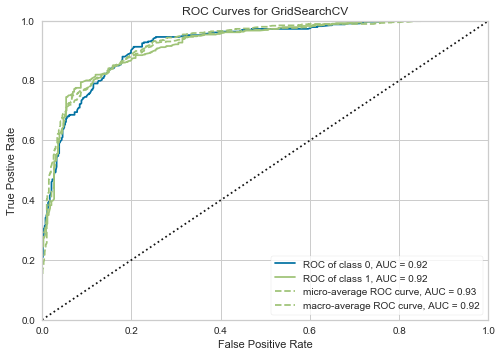

In [277]:
#check out ROC curve and resulting AUC
visualizer = ROCAUC(xgb_gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 92% (we look to have an excellent model)

In [ ]:
#Model Standings: 1) Random Forest (rf_gs: AUC = 94%, F1 = 84%, Acc = 85%)
                 #2) XGBoost (xgb_gs: AUC = 92%, F1 = 84%, Acc = 85%)
                 #3) Decision Tree (dtree_gs: AUC = 90%, F1 = 83%, Acc = 85%)